# Basics

### Q-1: Difference between AI, ML & DL

![AI-ML-DL](images/AI-vs-ML-vs-DL.png)

**AI:** It refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions.

**ML:** It is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.



### Q-2: Is deep learning better than machine learning?

Yes. How?
- DL can handle large data and also large dimension of data.
- when data is small, DL don't perform well because it requires large amount of data

![DL-vs-ML](images/DL-vs-ML.png)

# Deep Learning

### Q-1: Application of deep learning

1. Computer Vision
2. Object Detection
3. Image Recognition
4. NLP (Natural Language Processing)
5. Sentiment Analysis

### Q-2: What are the deep learning frameworks/tools

- TensorFlow
- PyTorch
- Keras
- mxnet
- theano

### Q-3: Deep learning backbone

Neural network.
1. ANN
2. CNN
3. RNN

### Q-4: What is perceptron?

Ans: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53

Perceptron is a basic unit of neural network. It consists of 4 parts.
1. Input values or One input layer
2. Weights and Bias
3. Net sum
4. Activation Function

![perceptron](images/perceptron.png)

### Q-5: Why do we need weight and bias?

**Weight(w):** A weight represent the strength of the connection between units.  If the weight from node 1 to node 2 has greater magnitude, it means that neuron 1 has greater influence over neuron 2.

**Bias(b):** Bias is used for shifting the activation function towards left or right, it can be referred to as a y-intercept in the line equation.

#### Q-5.1: What will happen if there is no weight?

We'll have fixed slope/gradient and that is not efficient.

#### Q-5.2: Can we initialize all the weights = 0?

Yes, but not recommended. We want every neuron to be unique. If we set all of them = 0, then there is absence of asymmetry.

#### Q-5.3: Can the weights be < 0? If so, what does that imply?

Yes, weights can be less than 0. Let's think of an example. A person wants to buy a car. We'll consider 2 feature that can affect the decision of the buyer.
1. The price of the car
2. The popularity of the car.

The relationship can be shown like this:
- $ buy \propto \frac{1}{price} $
- $ buy \propto popularity $

The equation of decision making: $decision = w_1*(price) + w_2*(popularity) + b$

From the above equation, it looks like there is a proprtional relation between `decision of buying` and `price`. But actually they are inversely proportional. So, to indicate this inverse nature, $w_1$ has to negative.

#### Q-5.4: What will happen if there is no bias?

Bias provides flexibility. For example, in linear equation($y=wx+b$), bias(y-intercept) defines the position of the line. 
- If there is no bias means $bias = 0$, the line will always go through the origin.
- We will only have control over the slope.

### Q-6: What is activation function?

- sigmoid
- tanh
- ReLU
- LeakyReLU
- softmax


#### Q-6.1: Derivative of `sigmoid` function

we know from formula: $ \frac{dy}{dx} = \frac{d}{dx}(\frac{u}{v}) = \frac{vu' - v'u}{v^2} $

$ \sigma(x) = \frac{1}{1 + e^{-x}} $

$ \sigma'(x) = \frac{0(1+e^{-x}) - (0 + (-1)(e^{-x}))*1}{(1+e^{-x})^2} $

$ \sigma'(x) = \frac{0 - (0 + (-1)(e^{-x}))}{(1+e^{-x})^2} $

$ \sigma'(x) = \frac{- (-(e^{-x}))}{(1+e^{-x})^2} $

$ \sigma'(x) = \frac{e^{-x}}{(1+e^{-x})^2} $

$ \sigma'(x) = \frac{e^{-x}}{(1+e^{-x})(1+e^{-x})} $

$ \sigma'(x) = \frac{1}{1+e^{-x}}*\frac{e^{-x}}{1+e^{-x}} $

$ \sigma'(x) = \sigma(x)\frac{e^{-x}}{1+e^{-x}} $ because $ \sigma(x) = \frac{1}{1 + e^{-x}} $

$ \sigma'(x) = \sigma(x)\frac{1+e^{-x}-1}{1+e^{-x}} $

$ \sigma'(x) = \sigma(x)(\frac{1+e^{-x}}{1+e^{-x}}-\frac{1}{1+e^{-x}}) $

$ \sigma'(x) = \sigma(x)(1-\frac{1}{1+e^{-x}}) $

$ \sigma'(x) = \sigma(x)(1-\sigma(x)) $

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")

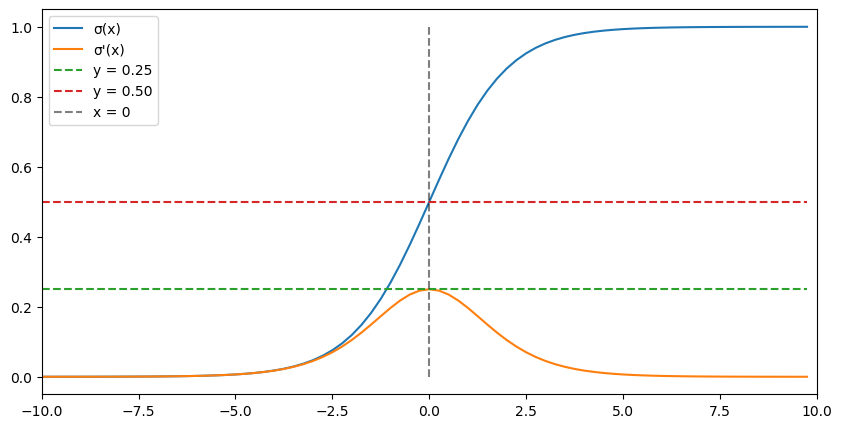

In [28]:
x = np.arange(-10, 10, 0.25)

sigmaX = 1/(1+np.exp(-x))
derivativeOfSigma = sigmaX*(1-sigmaX)

fix, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, sigmaX, label="σ(x)")
ax.plot(x, derivativeOfSigma, label="σ'(x)")
ax.plot(x, 0.25*np.ones(len(x)), "--", label="y = 0.25")
ax.plot(x, 0.5*np.ones(len(x)), "--", label="y = 0.50")
ax.plot(np.zeros(len(x)), np.linspace(0, 1, len(x)), "k--", label="x = 0", alpha=0.5)
ax.set(xlim=(-10,10))
ax.legend();

#### Q-6.2: Derivation of `softmax` function

It's a probilistic approach to determine the output. We normally use it at the final layer of our neural network.

if $ z = [z_1, z_2, z_3] $

$ S(z_1) = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}} $

$ S(z_2) = \frac{e^{z_2}}{e^{z_1}+e^{z_2}+e^{z_3}} $

$ S(z_3) = \frac{e^{z_3}}{e^{z_1}+e^{z_2}+e^{z_3}} $

So, $ S(z_1) + S(z_2) + S(z_3) = 1 $

##### Derivation

$ S(z_1) = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+e^{z_3}} $

w.r.t $z_1$,

$ \frac{\partial{S(z_1)}}{\partial{z_1}} = \frac{e^{z_1}(e^{z_1}+e^{z_2}+e^{z_3}) - (e^{z_1}+0+0)e^{z_1}}{(e^{z_1}+e^{z_2}+e^{z_3})^2} $

$ S'(z_1) =  \frac{e^{z_1}\Sigma - (e^{z_1})^2}{\Sigma^2} $ where, $ \Sigma = e^{z_1}+e^{z_2}+e^{z_3} $

$ S'(z_1) =  \frac{e^{z_1}\Sigma}{\Sigma^2} -  \frac{(e^{z_1})^2}{\Sigma^2} $

$ S'(z_1) =  \frac{e^{z_1}}{\Sigma} -  (\frac{e^{z_1}}{\Sigma})^2 $

$ S'(z_1) =  S(z_1) -  (S(z_1))^2 $

$ S'(z_1) =  S(z_1)(1-S(z_1)) $

Similarly,

w.r.t $ z_2 $, $ S'(z_2) =  -S(z_1)S(z_2) $

w.r.t $ z_3 $, $ S'(z_3) =  -S(z_1)S(z_3) $

Finally, $ S(z_1) = S(z_1)(1-S(z_1)) - S(z_1)S(z_2) - S(z_1)S(z_3)  $